In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/companys-ideal-customers/customer-personality-analysis.ipynb
/kaggle/input/customer-personality-analysis/marketing_campaign.csv


<p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Company's Ideal Customers <p/>

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Content
    </h2>
</div>

## Attributes

## People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

## Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target

Need to perform clustering to summarize customer segments.

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Import Required Libraries
    </h2>
</div>

In [2]:
# Importando bibliotecas
!pip install plotly==5.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.10.0
    Uninstalling plotly-5.10.0:
      Successfully uninstalled plotly-5.10.0


In [3]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">About This File
    </h2>
</div>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [4]:
# Download data

df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
display(df[0:5].T)

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


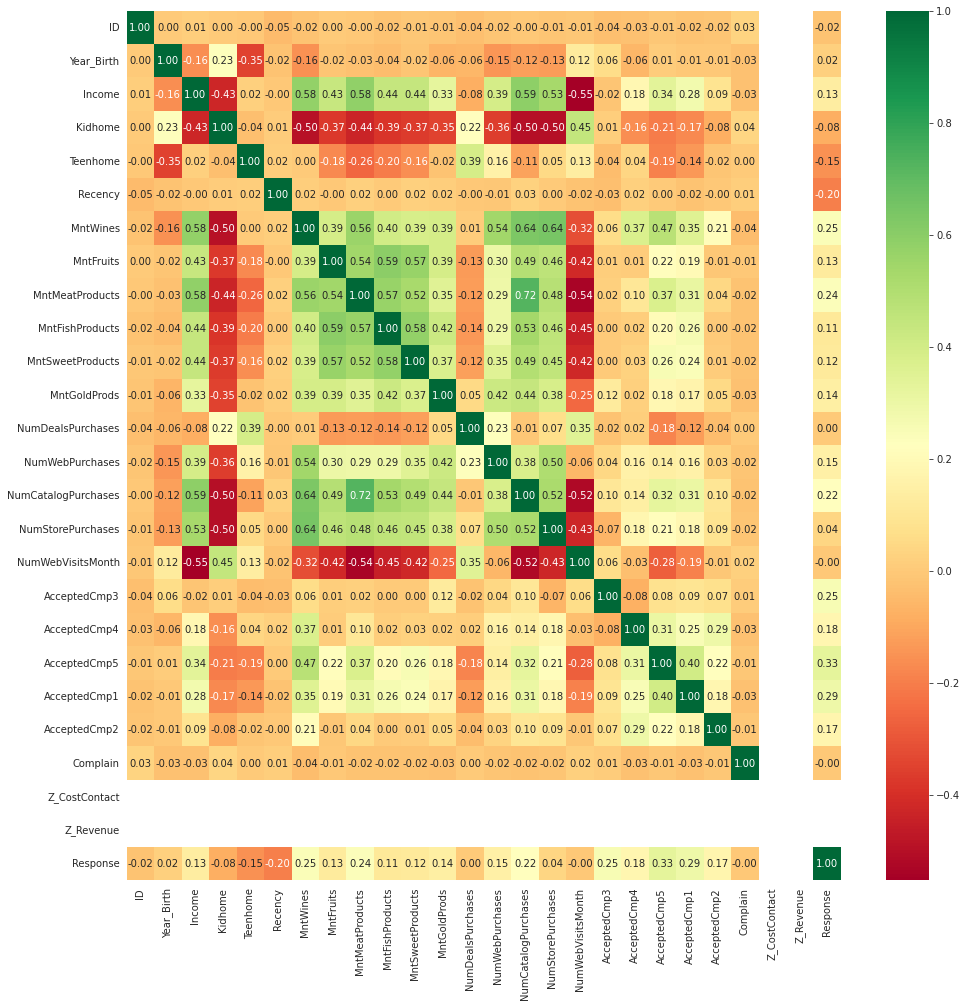

In [7]:
# Check correlation

df_corr = df.corr()
f, ax = plt.subplots(figsize=(16, 16))
# sns.heatmap(df_corr, vmax=.8, square=True)
# plt.show()

sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Duplicate
    </h2>
</div>

In [8]:
df.duplicated().sum()

0

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">NaN
    </h2>
</div>

In [9]:
# Checar dtype e NaN do dataframe
# Apenas a coluna 'Income' possue dados NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Downloading library to change null data in mean for 'Income columns'

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df.Income = mean_imputer.fit_transform(df[["Income"]])

In [11]:
# Check the number of null numbers (NaN)

df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Outliers
    </h2>
</div>

In [12]:
# Identify number of columns by type

numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 26
Discrete features Count 16
Continuous features Count 10
Categorical features Count 3
Binary Categorical features Count 0


In [13]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [14]:
# Remove outliers

def remove_outliers(df,outliers_features):
    # create copy of dataframe
    
    data = df.copy()
    
    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit         
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [15]:
df = remove_outliers(df,outliers_features)

In [16]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.00000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.0,1251.0,1251.000000
mean,5583.975220,1969.854516,38980.208249,0.685052,0.562750,48.845723,129.682654,5.58753,37.146283,7.031974,4.769784,16.355715,2.403677,2.924061,0.932054,4.039169,6.386091,0.064748,0.058353,0.009592,0.012790,0.006395,0.008793,3.0,11.0,0.104716
std,3255.590363,11.160413,14771.639663,0.535097,0.548324,29.141547,217.948866,8.28894,46.446668,8.439371,5.730738,15.024532,1.795359,2.266943,1.299608,2.157235,1.927593,0.246179,0.234504,0.097509,0.112411,0.079744,0.093395,0.0,0.0,0.306310
min,1.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2799.500000,1961.000000,28326.000000,0.000000,0.000000,24.000000,10.000000,0.00000,9.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5491.000000,1971.000000,38179.000000,1.000000,1.000000,49.000000,31.000000,3.00000,19.000000,4.000000,3.000000,12.000000,2.000000,2.000000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8374.000000,1978.000000,49588.500000,1.000000,1.000000,75.000000,152.000000,7.00000,48.000000,11.000000,7.000000,24.000000,3.000000,4.000000,1.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,90247.000000,2.000000,2.000000,99.000000,1184.000000,71.00000,352.000000,46.000000,24.000000,67.000000,15.000000,11.000000,10.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">People
    </h2>
</div>

In [17]:
# Checking non-numeric df columns

df.describe(include=['O'])

,Education,Marital_Status,Dt_Customer
count,1251,1251,1251
unique,5,7,563
top,Graduation,Married,23-03-2014
freq,577,489,8


In [18]:
# check the unique values
df['Education'].value_counts()

Graduation    577
PhD           291
Master        224
2n Cycle      111
Basic          48
Name: Education, dtype: int64

In [19]:
# check the unique values
df['Marital_Status'].value_counts()

Married     489
Together    324
Single      266
Divorced    131
Widow        36
Alone         3
YOLO          2
Name: Marital_Status, dtype: int64

In [20]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [21]:
# findout the first and last date in dataset
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

In [22]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

In [23]:
# adding columns about the day, month and year customer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

In [24]:
# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age_Customer'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])

In [25]:
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

In [26]:
#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [27]:
#Segmenting education levels in four groups
df["Education_Level"]=df["Education"].replace({"Basic":"Basic","2n Cycle":"2n Cycle", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [28]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [29]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Products / Promotion / Place
    </h2>
</div>

In [30]:
# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [31]:
# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [32]:
# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [33]:
print(df.shape)
df.sample(5)

(1251, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_Customer,Years_Customer,Days_Customer,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp
1471,Graduation,Married,34380.0,1,0,68,72,7,58,13,1,24,4,4,1,3,8,0,0,0,0,0,0,0,37,1,669,2013,February,Tuesday,Adult,1,Yes,Graduate,175,12,0
1544,Graduation,Divorced,51983.0,0,1,95,631,0,115,10,7,30,3,9,2,10,7,0,0,0,0,0,0,0,50,2,827,2012,August,Friday,Middel Aged,1,No,Graduate,793,24,0
1985,Graduation,Together,21994.0,0,1,4,9,0,6,3,1,3,1,0,0,3,5,0,0,0,0,0,0,0,57,2,712,2012,December,Monday,Middel Aged,1,Yes,Graduate,22,4,0
1662,Graduation,Divorced,64892.0,0,1,77,527,24,230,32,24,65,2,6,4,12,4,0,0,0,0,0,0,0,38,0,191,2014,May,Thursday,Adult,1,No,Graduate,902,24,0
631,PhD,Together,65488.0,0,0,46,603,45,207,36,18,54,1,3,4,6,1,0,0,0,0,0,0,0,56,0,176,2014,June,Friday,Middel Aged,0,Yes,Postgraduate,963,14,0


In [34]:
df.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

In [35]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_Customer,Days_Customer,Age_Group,Children,Partner,Education_Level,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,125,Middel Aged,2,No,Graduate,27,6,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,65,Adult,1,Yes,Graduate,53,8,0
7,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,29,488,Adult,1,Yes,Postgraduate,169,10,0
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,40,548,Adult,1,Yes,Postgraduate,46,6,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,64,268,Middel Aged,2,Yes,Postgraduate,49,2,1


In [36]:
# Checking non-numeric df columns

df.describe(include=['O'])

,Partner,Education_Level
count,1251,1251
unique,2,4
top,Yes,Graduate
freq,813,577


In [37]:
# Use the "labelencoder" to transform the categorical columns into numeric


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()

df['Partner']= label_encoder.fit_transform(df['Partner'])
df['Education_Level']= label_encoder.fit_transform(df['Education_Level'])

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Feature Transformation
    </h2>
</div>

In [38]:
# selecting the cols to use
df_clus = df[['Income','Kidhome','Teenhome','Age_Customer','Partner','Education_Level', 'TotalMntSpent', 'Total_Acc_Cmp']]
print('This is the data we will use for clustering:')
df_clus.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age_Customer,Partner,Education_Level,TotalMntSpent,Total_Acc_Cmp
1,46344.0,1,1,60,0,2,27,0
3,26646.0,1,0,30,1,2,53,0
7,33454.0,1,0,29,1,3,169,0
8,30351.0,1,0,40,1,3,46,1
9,5648.0,1,1,64,1,3,49,1


In [39]:
# examin the min, max and mean of your columns
df_clus.describe()

,Income,Kidhome,Teenhome,Age_Customer,Partner,Education_Level,TotalMntSpent,Total_Acc_Cmp
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000
mean,38980.208249,0.685052,0.562750,44.145484,0.649880,2.195843,200.573941,0.256595
std,14771.639663,0.535097,0.548324,11.160413,0.477198,0.875908,265.456488,0.596411
min,1730.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,0.000000
25%,28326.000000,0.000000,0.000000,36.000000,0.000000,2.000000,44.000000,0.000000
50%,38179.000000,1.000000,1.000000,43.000000,1.000000,2.000000,80.000000,0.000000
75%,49588.500000,1.000000,1.000000,53.000000,1.000000,3.000000,257.000000,0.000000
max,90247.000000,2.000000,2.000000,74.000000,1.000000,3.000000,1621.000000,5.000000


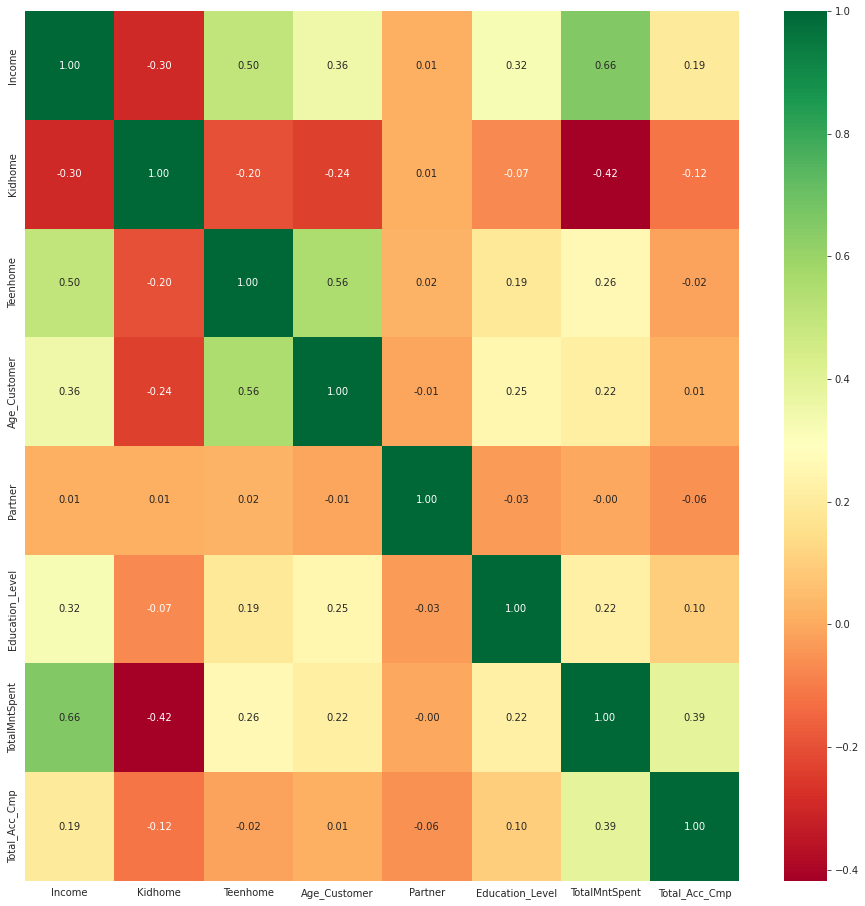

In [40]:
df_clus_corr = df_clus.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(df_clus_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Clusters - KMeans
    </h2>
</div>

In [41]:
# Libraries for clustering and evaluation
! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

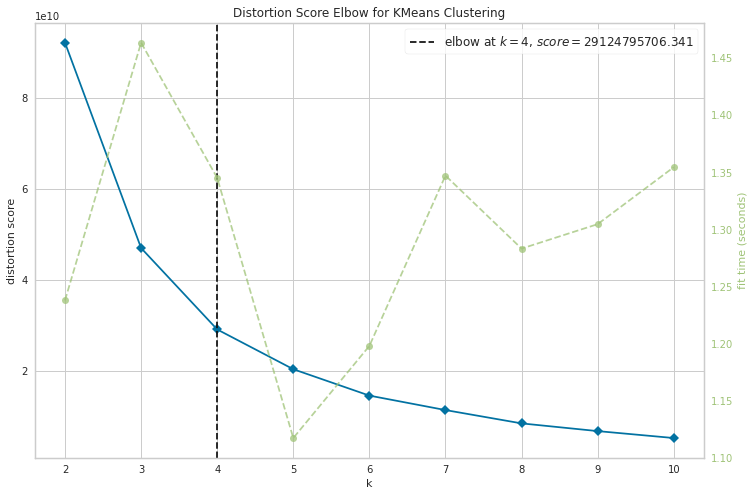

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(df_clus)
elbow_graph.show()

In [43]:
# instanciar um agrupador, ou seja, um clusterizador
# 4 clusters (grupos)
agrupador = KMeans(n_clusters = 4)

In [44]:
# Agrupar em 4 grupos e criar uma variável com os labels
agrupador.fit(df_clus)
labels = agrupador.labels_
print(labels)

[3 2 0 ... 1 1 3]


In [45]:
# Criando um gráfico (go = graphic object) com os dados da labels em duas dimensões ('Income' e 'Age_Customer')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_clus['Income'], y = df_clus['Age_Customer'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.update_layout(title = 'Income X Age_Customer')
fig.update_xaxes(title = 'Income')
fig.update_yaxes(title = 'Age_Customer')
fig.show()

In [46]:
# Criando um gráfico (go = graphic object) com os dados da labels em duas dimensões ('Income' e 'TotalMntSpent')
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_clus['Income'], y = df_clus['TotalMntSpent'],
                                                        mode = 'markers',                      
                                                        marker = dict(color = agrupador.labels_.astype(np.float)),
                                                        text = labels))
fig.update_layout(title = 'Income X TotalMntSpent')
fig.update_xaxes(title = 'Income')
fig.update_yaxes(title = 'TotalMntSpent')
fig.show()

In [47]:
# Criando um gráfico em 3 dimensões
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df_clus['Income'],
                         y = df_clus['Age_Customer'], z = df_clus['TotalMntSpent'],
                         mode = 'markers',                      
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Coeficiente de Silhueta - KMeans
    </h2>
</div>

In [48]:
# Primeiro vamos utlizar o KMeans para clusterizar os dados
agrupador = KMeans(n_clusters = 4)
agrupador.fit(df_clus)
labels = agrupador.labels_
labels

array([3, 0, 1, ..., 2, 2, 3], dtype=int32)

In [49]:
# Importando biblioteca
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
# Criando uma range
faixa_n_clusters = [i for i in range(2,10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [51]:
# Importando KMeans e aplicando o silhouette
from sklearn.cluster import KMeans
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(df_clus)
    media_silhueta = silhouette_score(df_clus, labels)
    valores_silhueta.append(media_silhueta)

In [52]:
agrupador_kmeans = KMeans(n_clusters = 4)
labels_kmeans = agrupador_kmeans.fit_predict(df_clus)
print("Labels K-means: ", labels_kmeans)


Labels K-means:  [2 1 0 ... 3 3 2]


In [53]:
# Pelo coeficiente o mais indicado para a clusterização é o K-mean
print("O coeficiente de silhueta do K-means é:", silhouette_score(df_clus, labels_kmeans))

O coeficiente de silhueta do K-means é: 0.5343410274952207


### O coeficiente de silhuete varia de -1 a 1. Sendo positivo, já consideramos bom, e quanto mais próximo de 1, melhor.


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Atributos do Cluster
    </h2>
</div>

In [54]:
# Resumo estatístico dos dados por cluster
import seaborn as sns
df_clus["cluster"] = labels_kmeans
df_clus.groupby("cluster").describe()

Income                                                         \
         count          mean          std      min       25%      50%   
cluster                                                                 
0        431.0  34718.515081  3815.735359  27573.0  31424.50  34738.0   
1        298.0  20284.335570  5653.757178   1730.0  17145.00  21903.0   
2        354.0  48259.334799  4156.670701  41551.0  44610.25  47982.0   
3        168.0  63523.952381  6578.037576  55954.0  58646.00  61998.0   

                           Kidhome                                           \
              75%      max   count      mean       std  min  25%  50%   75%   
cluster                                                                       
0        37950.00  41473.0   431.0  0.872390  0.441934  0.0  1.0  1.0  1.00   
1        24627.75  27469.0   298.0  0.771812  0.494015  0.0  0.0  1.0  1.00   
2        51940.50  55842.0   354.0  0.573446  0.549505  0.0  0.0  1.0  1.00   
3        65762.25  90247.0   168.0  0.285714  0.526460  0.0  0.0  0.0  0.25   

             Teenhome                                               \
         max    count      mean       std  min  25%  50%  75%  max   
cluster                                                              
0        2.0    431.0  0.459397  0.530554  0.0  0.0  0.0  1.0  2.0   
1        2.0    298.0  0.171141  0.377266  0.0  0.0  0.0  0.0  1.0   
2        2.0    354.0  0.844633  0.465388  0.0  1.0  1.0  1.0  2.0   
3        2.0    168.0  0.928571  0.458733  0.0  1.0  1.0  1.0  2.0   

        Age_Customer                                                      \
               count       mean        std   min   25%   50%   75%   max   
cluster                                                                    
0              431.0  42.271462  10.389310  19.0  35.0  41.0  48.0  67.0   
1              298.0  38.949664  10.592267  18.0  30.0  38.0  44.0  68.0   
2              354.0  48.290960  10.366244  22.0  40.0  48.0  57.0  74.0   
3              168.0  49.434524  10.290185  23.0  41.0  49.0  59.0  68.0   

        Partner                                              Education_Level  \
          count      mean       std  min  25%  50%  75%  max           count   
cluster                                                                        
0         431.0  0.645012  0.479066  0.0  0.0  1.0  1.0  1.0           431.0   
1         298.0  0.651007  0.477454  0.0  0.0  1.0  1.0  1.0           298.0   
2         354.0  0.632768  0.482733  0.0  0.0  1.0  1.0  1.0           354.0   
3         168.0  0.696429  0.461174  0.0  0.0  1.0  1.0  1.0           168.0   

                                                     TotalMntSpent  \
             mean       std  min  25%  50%  75%  max         count   
cluster                                                              
0        2.271462  0.797145  0.0  2.0  2.0  3.0  3.0         431.0   
1        1.694631  0.941400  0.0  1.0  2.0  2.0  3.0         298.0   
2        2.319209  0.843118  0.0  2.0  2.0  3.0  3.0         354.0   
3        2.630952  0.584834  0.0  2.0  3.0  3.0  3.0         168.0   

                                                                     \
               mean         std   min    25%    50%     75%     max   
cluster                                                               
0         93.185615   92.003073   8.0   38.0   61.0  113.00   630.0   
1         55.738255   40.023460   5.0   29.0   48.0   69.00   269.0   
2        249.474576  235.098257  15.0   68.0  190.0  346.00  1396.0   
3        629.946429  358.113073  18.0  381.5  585.5  874.25  1621.0   

        Total_Acc_Cmp                                               
                count      mean       std  min  25%  50%  75%  max  
cluster                                                             
0               431.0  0.197216  0.482813  0.0  0.0  0.0  0.0  3.0  
1               298.0  0.191275  0.485817  0.0  0.0  0.0  0.0  2.0  
2               354.0  

In [55]:
# Analise estatística do atributo 'Income'
df_clus.groupby("cluster")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,431.0,34718.515081,3815.735359,27573.0,31424.50,34738.0,37950.00,41473.0
1,298.0,20284.335570,5653.757178,1730.0,17145.00,21903.0,24627.75,27469.0
2,354.0,48259.334799,4156.670701,41551.0,44610.25,47982.0,51940.50,55842.0
3,168.0,63523.952381,6578.037576,55954.0,58646.00,61998.0,65762.25,90247.0


In [56]:
# Análise dos atributos selecionandos usando somente o média (mean)
# Incluindo também a coluna n_clients

description = df_clus.groupby("cluster")["Income", "Kidhome", "Teenhome", "Age_Customer", "Partner", "Education_Level", "TotalMntSpent", "Total_Acc_Cmp"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

               Income   Kidhome  Teenhome  Age_Customer   Partner  \
cluster                                                             
0        34718.515081  0.872390  0.459397     42.271462  0.645012   
1        20284.335570  0.771812  0.171141     38.949664  0.651007   
2        48259.334799  0.573446  0.844633     48.290960  0.632768   
3        63523.952381  0.285714  0.928571     49.434524  0.696429   

         Education_Level  TotalMntSpent  Total_Acc_Cmp  n_clients  
cluster                                                            
0               2.271462      93.185615       0.197216        431  
1               1.694631      55.738255       0.191275        298  
2               2.319209     249.474576       0.234463        354  
3               2.630952     629.946429       0.571429        168  


<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color:rgb(106,90,205);">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Interpreting the Clusters
    </h2>
</div>

<div style="color:White;
           display:fill;
           background-color:blue;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>The cluster with the higherest income has these characteristics:</b></h3>
           <p style="color:white;font-size:110%;padding-left:50px">
           1. Well Educated <br>
2. Lesser number of children <br>
3. Higherest TotalMntSpent <br>
4. Higherest Total_Acc_Cmp <br>
5. Low number of Teenhome 
        </p>
    <h3 style="color:white;padding-left:20px"><b>The cluster with the second income has these characteristics:</b></h3>
    <p style="color:white;font-size:110%;padding-left:50px">
    1. Highest Age_Customer <br>
2. Second TotalMntSpent<br>
3. Large n_clients<br>
4. Low number of Teenhome<br>
5. Higherest Teenhome
    </p>
    </div>
    
 <div style="color:White;
           display:fill;
           background-color:blue;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>The cluster with the third income has these characteristics:</b></h3>
          <p style="color:white;font-size:110%;padding-left:50px">
           1. Greater number of children <br>
2. Large n_clients
 <br>
3. High Teenhome <br>
4. Well Educated <br>
5. High n_clients 
        </p>
    <h3 style="color:white;padding-left:20px"><b>The cluster with the lowerest income has these characteristics:</b></h3>
    <p style="color:white;font-size:110%;padding-left:50px">
    1. Lowerest Age_Customer
 <br>
2. Lowerest level of education<br>
3. Lowerest TotalMntSpent<br>
4. Lowerest Total_Acc_Cmp<br>
5. Higherest Kidhome
    </p>
    </div>

** This analysis can be completed by type of products and promotions.
